In [52]:
import pandas as pd
import mlxtend as mle
import pickle
import numpy as np
from lightgbm import LGBMRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
split = 1
tgt = 'Water_norm'
with open(f'/home/anton/Repos/untapped-nrj/data/interim/{tgt}_for_sfe.pck','rb') as f:
    dataset = pickle.load(f)
X_train = dataset[f'X_{split}']
y_train = dataset[f'y_{split}']

X_holdout = dataset[f'X_holdout_{split}']
y_holdout = dataset[f'y_holdout_{split}']
    
class LogLGBM(LGBMRegressor):
    def fit(self, X, Y, **kwargs):
        y_train = np.log1p(Y)
        super(LogLGBM, self).fit(X, y_train, **kwargs)

        return self

    def predict(self, X):
        preds = super(LogLGBM, self).predict(X)
        preds = np.expm1(preds)
        return preds    
model = LogLGBM(
            learning_rate=0.08,
            n_estimators=500,
            objective="mse",
            num_leaves=32,
            random_state=123
        )

In [ ]:
sfs =SFS(estimator=model,k_features = (8,40),
            floating=True, 
          scoring='neg_mean_absolute_error',cv=5,n_jobs=-1,verbose= 1)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    5.0s finished
Features: 1/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s finished
Features: 2/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.6s finished
Features: 3/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent wo

Features: 21/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:   10.4s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    6.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    9.5s finished
Features: 22/40[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:   10.3s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  22 | elapsed:    6.5s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    9.8s finished
Features: 23/40[Parallel(n_jobs=-1)]: Using backend Lo

(-2.0, -1.0)

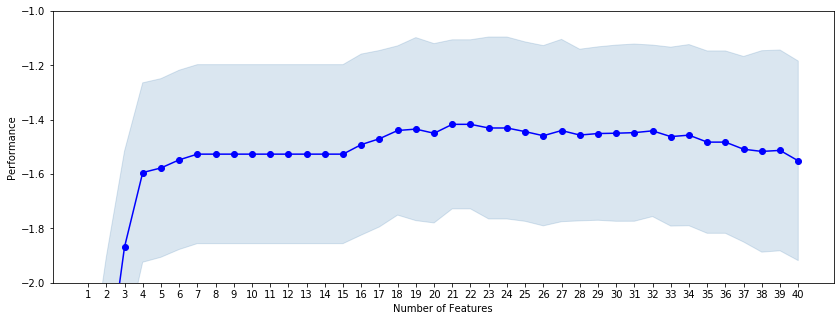

In [48]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize = (14,5))
plt.ylim([-2.0,-1.0])

In [51]:
feats = sfs.get_metric_dict()[22]['feature_names']
set(X_train.columns) -set(feats)

{'ConfidentialReleaseDate',
 'CurrentOperator',
 'DaysDrilling',
 'DrillMetresPerDay',
 'DrillingContractor',
 'FinalDrillDate',
 'KBElevation',
 'LengthDrill',
 'LicenceDate',
 'Municipality',
 'Pool',
 'ProjectedDepth',
 'RigReleaseDate',
 'SpudDate',
 'StatusSource',
 'SurfaceOwner',
 'TVD',
 'TotalDepth',
 'UnitName',
 '_Fracture`Stages',
 'cf_timediff',
 'final_timediff',
 'rrd_timediff',
 'st_timediff'}

In [50]:
#feats

('WellType',
 'Formation',
 'Field',
 'Surf_Longitude',
 'Surf_Latitude',
 'GroundElevation',
 'LaheeClass',
 'WellProfile',
 '_Max`Prod`(BOE)',
 'Confidential',
 '_Open`Hole',
 'Agent',
 'StatusDate',
 'SurfAbandonDate',
 'Licensee',
 'LicenseNumber',
 'CurrentOperatorParent',
 'OSArea',
 'OSDeposit',
 'HZLength',
 'timediff',
 'lic_timediff')